# SOLLDA1

### Loading Adidas dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_dir = "dataset/"
country_dim = pd.read_csv(dataset_dir + "country_dim.csv")
shoes_dim = pd.read_csv(dataset_dir + "shoes_dim.csv")
shoes_fact = pd.read_csv(dataset_dir + "shoes_fact.csv")

### Describing the Dataset

| **Variable**        | **Description**                                      | **Example**         |
|---------------------|------------------------------------------------------|---------------------|
| **name**           | Model name of the shoe                               | Adidas Ultraboost  |
| **id**             | SKU (Stock Keeping Unit)                             | FW4312             |
| **price**          | Price in **Euros (€)**                               | 120.99             |
| **category**       | Shoe style/type                                      | Running, Casual    |
| **dominant_color** | Main color of the shoe                              | Black              |
| **sub_color1**     | First accent color                                  | White              |
| **sub_color2**     | Second accent color                                 | Red                |
| **best_for_wear**  | Recommended occasion/use                            | Sports, Casual     |
| **size**           | Shoe size (EU, US, UK formats)                      | EU 42, US 9, UK 8  |
| **availability**   | Stock level (**Min: 0, Max: 15**)                    | 10                 |
| **image_url**      | Link to the shoe image (side view)                  | *(URL to Image)*   |
| **gender**         | Target gender (U = Unisex, W = Women, M = Men, K = Kids) | M            |
| **date**           | Date of listing (**dd/mm/yyyy**)                     | 15/03/2025         |
| **country_code**   | Country where the shoe is available (US, DE, UK, BE) | US                 |


### Checking out the dimensions

In [120]:
country_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  4 non-null      object
 1   currency      4 non-null      object
 2   shoe_metric   4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [121]:
shoes_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3302 non-null   object
 1   name            3302 non-null   object
 2   best_for_wear   3302 non-null   object
 3   gender          3302 non-null   object
 4   image_url       3302 non-null   object
 5   dominant_color  3302 non-null   object
 6   sub_color1      3300 non-null   object
 7   sub_color2      3298 non-null   object
dtypes: object(8)
memory usage: 206.5+ KB


In [122]:
shoes_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    299156 non-null  int64  
 1   id            299156 non-null  object 
 2   price         299156 non-null  float64
 3   category      299156 non-null  object 
 4   size          299156 non-null  object 
 5   availability  299156 non-null  int64  
 6   date          299156 non-null  object 
 7   country_code  299156 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


### Merge first

In [123]:
country_dim

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


In [124]:
shoes_dim.head(5)

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One


In [125]:
shoes_fact.rename(columns={"Unnamed: 0" : "SN"}, inplace=True)
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE


In [126]:
#drop duplicates from shoes_dim, keep the first
shoes_dim.drop_duplicates(subset="id", keep="first", inplace=True)

In [127]:
shoes_fact = pd.merge(shoes_fact, shoes_dim, on="id", suffixes=('_shoes_fact', '_shoes_dim'))
shoes_fact.columns


Index(['SN', 'id', 'price', 'category', 'size', 'availability', 'date',
       'country_code', 'name', 'best_for_wear', 'gender', 'image_url',
       'dominant_color', 'sub_color1', 'sub_color2'],
      dtype='object')

In [128]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White


In [129]:
shoes_fact = pd.merge(shoes_fact, country_dim, on="country_code", suffixes=('_shoes_fact', '_country_dim'))

In [130]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu


In [131]:
#drop image_url
shoes_fact.drop( columns=["image_url"], inplace=True)

In [132]:

print(shoes_fact["category"].value_counts())
shoes_fact.loc[shoes_fact["category"] == "us/soccer-shoes", "category"] = "football-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/walking-shoes", "category"] = "walking-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/athletic_sneakers", "category"] = "athletic_sneakers"
shoes_fact.loc[shoes_fact["category"] == "us/running-shoes", "category"] = "running-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/workout-shoes", "category"] = "gym_training-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/hiking-shoes", "category"] = "hiking-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/tennis-shoes", "category"] = "tennis-shoes"
#check if the transformation was successful
shoes_fact["category"].value_counts()

category
running-shoes           78955
sneakers                74676
outdoor-shoes           44314
walking-shoes           31583
us/athletic_sneakers    20183
athletic_sneakers       10191
tennis-shoes             9518
gym_training-shoes       7911
football-shoes           4518
us/walking-shoes         4157
us/running-shoes         3896
us/soccer-shoes          3789
occer-shoes              2063
us/workout-shoes         1402
us/hiking-shoes           863
hiking-shoes              863
us/tennis-shoes           274
Name: count, dtype: int64


category
running-shoes         82851
sneakers              74676
outdoor-shoes         44314
walking-shoes         35740
athletic_sneakers     30374
tennis-shoes           9792
gym_training-shoes     9313
football-shoes         8307
occer-shoes            2063
hiking-shoes           1726
Name: count, dtype: int64

In [133]:
shoes_fact[shoes_fact["size"].str.contains("1/3|2/3")].head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
5,63580,HP9426,60.0,sneakers,39 1/3,15,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
7,63582,HP9426,60.0,sneakers,40 2/3,15,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


In [134]:
shoes_fact[~shoes_fact["size"].str.contains("^\d+\.?\d*/\d+\.?\d*$")].head(5)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tamse\AppData\Local\Temp\ipykernel_6264\888794530.py:1: SyntaxWarning: invalid escape sequence '\d'
  shoes_fact[~shoes_fact["size"].str.contains("^\d+\.?\d*/\d+\.?\d*$")].head(5)


,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


In [135]:
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*1/3", r"\1.33", regex=True
)
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*2/3", r"\1.66", regex=True
)
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*1/2", r"\1.5", regex=True
)

In [136]:
shoes_fact["size"].value_counts()

size
40       13165
39.33    13123
38.66    11176
42       10921
42.66    10875
         ...  
45.66        7
45           7
46.33        7
55.66        3
2K           1
Name: count, Length: 150, dtype: int64

The size column includes values like 10K, 11K, 2K, etc. for kids sizing. 

### Cleaning Date

The date is encoded in different formats.

In [137]:
shoes_fact.loc[shoes_fact["date"].str.contains("-", na=False), "date"] = (
    shoes_fact["date"]
    .loc[shoes_fact["date"].str.contains("-", na=False)]
    .apply(lambda x: f"{x.split('-')[2]}/{x.split('-')[1]}/{x.split('-')[0]}")
)

Date is transformed into DD/MM/YYYY format.

In [138]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36.66,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37.33,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38.66,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


### Grouping Color 
There are too many values for color, thus they will be grouped into the 11 basic color names: white, black, gray, red, orange, yellow, green, blue, purple, pink, and brown.

In [139]:
#shoes_fact[["dominant_color", "sub_color1", "sub_color2"]]
color_map = {
    "ivory": "White",
    "white": "White",
    "gum": "White",
    "quartz": "White",
    "chalk": "White",
    "talc": "White",
    "alumina": "White",
    "vanilla": "White",
    "granite": "White",
    "sesame": "White",
    "black": "Black",
    "carbon": "Black",
    "cinder": "Black",
    "pewter": "Black",
    "coal": "Black",
    "mauve": "Pink",
    "clay": "Pink",
    "fuchsia": "Pink",
    "orchid": "Pink",
    "blush": "Pink",
    "pink": "Pink",
    "coral": "Pink",
    "bliss": "Pink",
    "berry": "Pink",
    "rose": "Pink",
    "magenta": "Pink",
    "ink": "Black",
    "onix": "Gray",
    "gray": "Gray",
    "metallic": "Gray",
    "met.": "Gray",
    "metalic": "Gray",
    "steel": "Gray",
    "silver": "Gray",
    "stone": "Gray",
    "grey": "Gray",
    "ruby": "Red",
    "crimson": "Red",
    "scarlet": "Red",
    "maroon": "Red",
    "red": "Red",
    "amber": "Orange",
    "orange": "Orange",
    "lemon": "Yellow",
    "spark": "Yellow",
    "yellow": "Yellow",
    "gold": "Yellow",
    "green": "Green",
    "mint": "Green",
    "cargo": "Green",
    "olive": "Green",
    "ivy": "Green",
    "jade": "Green",
    "turbo": "Green",
    "pine": "Green",
    "lime": "Green",
    "navy": "Blue",
    "sky": "Blue",
    "royal": "Blue",
    "marine": "Blue",
    "cyan": "Blue",
    "blue": "Blue",
    "night": "Blue",
    "aqua": "Blue",
    "teal": "Blue",
    "purple": "Purple",
    "lavender": "Purple",
    "fig": "Purple",
    "lilac": "Purple",
    "indigo": "Purple",
    "violet": "Purple",
    "taupe": "Brown",
    "brown": "Brown",
    "gobi": "Brown",
    "bronze": "Brown",
    "burgundy": "Brown",
    "cardboard": "Brown",
    "mesa": "Brown",
    "sand": "Brown",
    "earth": "Brown",
    "cargo": "Brown",
    "savanna": "Brown",
    "copper": "Brown",
    "oat": "Brown",
    "beige": "Brown"
}

def classify_color(color):
    if pd.isna(color):  # Handle NaN values
        return np.nan
    color_lower = str(color).lower()  # Ensure it's a string before using .lower()
    
    for keyword, category in color_map.items():
        if keyword in color_lower:  
            return category  # Return the mapped category
    return color  # If no match, return original value 


shoes_fact[["dominant_color", "sub_color1", "sub_color2"]] = shoes_fact[["dominant_color", "sub_color1", "sub_color2"]].applymap(classify_color)

C:\Users\tamse\AppData\Local\Temp\ipykernel_6264\2561075198.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shoes_fact[["dominant_color", "sub_color1", "sub_color2"]] = shoes_fact[["dominant_color", "sub_color1", "sub_color2"]].applymap(classify_color)


In [140]:
print(shoes_fact["dominant_color"].unique())
print(shoes_fact["sub_color1"].unique())
print(shoes_fact["sub_color2"].unique())

['White' 'Black' 'Gray' 'Blue' 'Pink' 'Yellow' 'Red' 'Green' 'Purple'
 'Non Dyed' 'Brown' 'Orange' 'Supplier Colour']
['Black' 'White' 'Gray' 'Pink' 'Blue' 'Iridescent' 'Red' 'Green'
 'Supplier Colour' 'Brown' 'Purple' 'Yellow' 'Orange' nan 'Non Dyed']
['White' 'Green' 'Red' 'Gray' 'Black' 'Blue' 'Yellow' 'Pink' 'Brown'
 'Purple' 'Orange' nan 'Supplier Colour']


In [141]:
shoes_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SN              299156 non-null  int64  
 1   id              299156 non-null  object 
 2   price           299156 non-null  float64
 3   category        299156 non-null  object 
 4   size            299156 non-null  object 
 5   availability    299156 non-null  int64  
 6   date            299156 non-null  object 
 7   country_code    299156 non-null  object 
 8   name            299156 non-null  object 
 9   best_for_wear   299156 non-null  object 
 10  gender          299156 non-null  object 
 11  dominant_color  299156 non-null  object 
 12  sub_color1      298880 non-null  object 
 13  sub_color2      298680 non-null  object 
 14  currency        299156 non-null  object 
 15  shoe_metric     299156 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 36.5+ 

In [142]:
shoes_fact.describe()

,SN,price,availability
count,299156.000000,299156.000000,299156.000000
mean,466431.465376,99.715583,5.868500
std,226847.605994,58.325251,6.718055
min,63575.000000,16.000000,0.000000
25%,267723.750000,55.000000,0.000000
50%,453134.500000,88.200000,1.000000
75%,664428.250000,130.000000,15.000000
max,847282.000000,500.000000,15.000000


### Renaming Gender Labels

In [143]:
gender_mapping = {
    "U": "Unisex",
    "W": "Women",
    "K": "Kids",
    "M": "Men"
}

shoes_fact["gender"] = shoes_fact["gender"].replace(gender_mapping)

In [144]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
1,63576,HP9426,60.0,sneakers,36.66,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
2,63577,HP9426,60.0,sneakers,37.33,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
4,63579,HP9426,60.0,sneakers,38.66,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu


## Exploratory Data Analysis (EDA)

### EDA Questions:
##### Univariate EDA
1. Which shoe category has the most listings on the Adidas webstore?
2. Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?




### Question 1  - Which shoe category has the most listings on the Adidas webstore?

In [145]:
#  Aggregate total availability per shoe model (id)
availability_per_id = shoes_fact.groupby('id', as_index=False)['availability'].sum()

# Merge back to retain category information 
df_unique = shoes_fact[['id', 'category']].drop_duplicates()
df_merged = df_unique.merge(availability_per_id, on='id')

# Count categories weighted by total availability
category_weighted = df_merged.groupby('category')['availability'].sum().sort_values(ascending=False)

print("\nCategory Frequency Distribution (Weighted by Availability):")
print(category_weighted.to_string())



Category Frequency Distribution (Weighted by Availability):
category
running-shoes         656736
sneakers              623278
walking-shoes         565449
athletic_sneakers     483330
outdoor-shoes         305995
gym_training-shoes     82709
tennis-shoes           77599
hiking-shoes           73241
football-shoes         64251
occer-shoes            49936


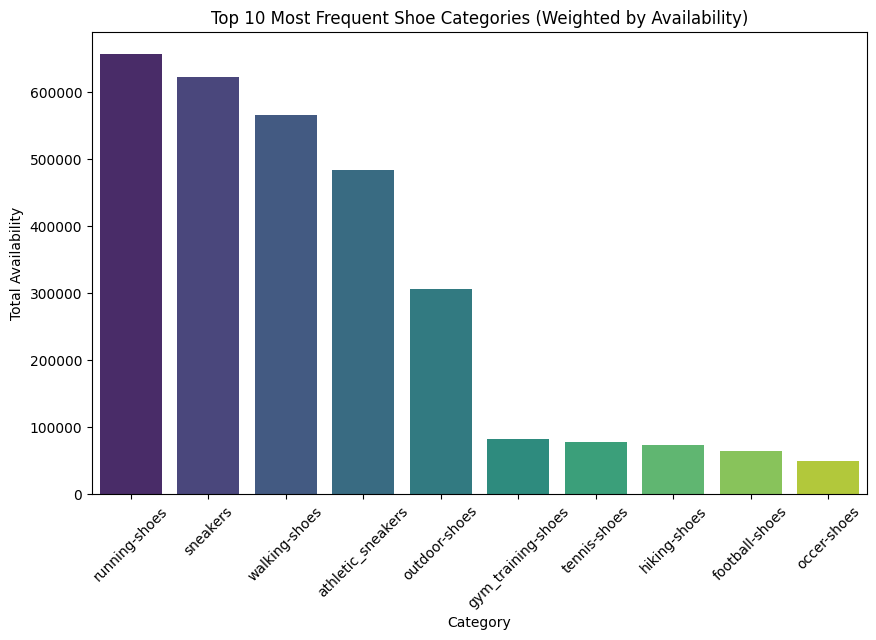

In [ ]:
top_n = 10 
category_counts = category_weighted.head(top_n)  

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, 
            y=category_counts.values, 
            hue=category_counts.index, 
            palette="viridis", 
            legend=False)

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Availability")
plt.title(f"Top {top_n} Most Frequent Shoe Categories (Weighted by Availability)")

plt.show()


In [147]:
category_precentage = shoes_fact['category'].value_counts(normalize=True) * 100
print(category_precentage)

category
running-shoes         27.694915
sneakers              24.962227
outdoor-shoes         14.813007
walking-shoes         11.946944
athletic_sneakers     10.153231
tennis-shoes           3.273209
gym_training-shoes     3.113091
football-shoes         2.776812
occer-shoes            0.689607
hiking-shoes           0.576957
Name: proportion, dtype: float64


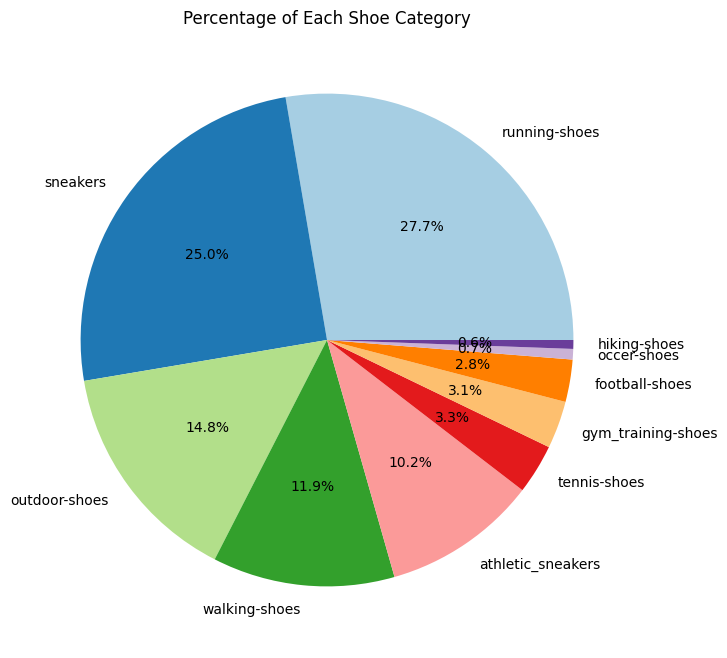

In [201]:
categories = category_precentage.index.tolist()
percentages = category_precentage.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Percentage of Each Shoe Category")
plt.show()


### **Adidas Shoe Inventory Category Analysis**  

The Adidas shoe inventory is dominated by **running shoes**, which account for **27.69%** of the total proportion and have the highest weighted frequency at **656,736**. This indicates a strong focus on running as a key category.  

**Sneakers** follow closely, representing **24.96%** of the inventory with a weighted frequency of **623,278**, highlighting their popularity and broad appeal.  

**Outdoor shoes** and **walking shoes** also hold significant shares, with proportions of **14.81%** and **11.95%**, respectively, and weighted frequencies of **305,995** and **565,449**. This suggests a balanced emphasis on both outdoor activities and casual wear.  

Categories like **tennis shoes**, **gym training shoes**, and **football shoes** have smaller proportions, ranging from **3.27%** to **0.69%**, reflecting their niche appeal.  

Overall, the inventory distribution aligns with Adidas's positioning as a brand catering to both performance and lifestyle footwear, with a clear focus on **running shoes** and **sneakers** as the core categories.

### Question 2 - Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?

In [182]:
# Aggregate total availability per gender
gender_counts = shoes_fact['gender'].value_counts()
availability_per_gender = shoes_fact.groupby('gender')['availability'].sum().sort_values(ascending=False)

print("\nTotal Availability per Gender:")
print(availability_per_gender.to_string())



Total Availability per Gender:
gender
Unisex    758211
Women     431651
Kids      426602
Men       139133


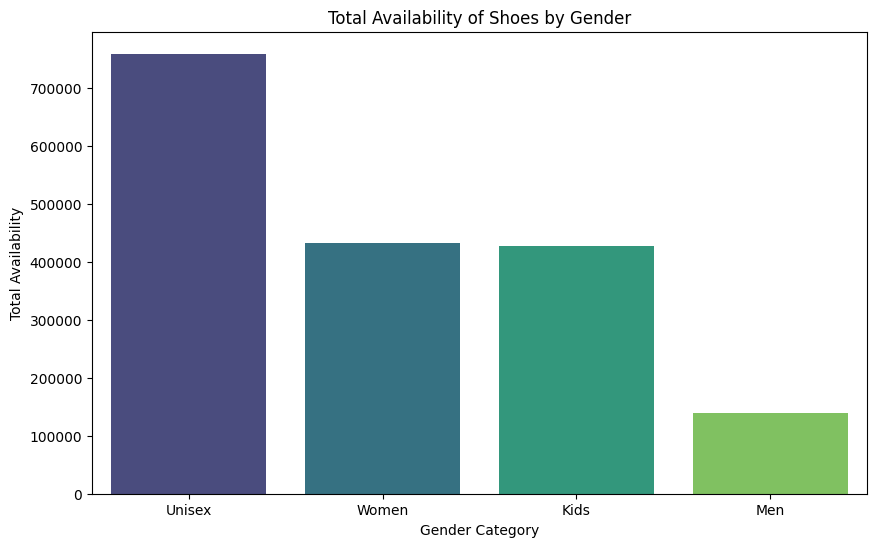

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=availability_per_gender.index, 
    y=availability_per_gender.values, 
    hue=availability_per_gender.index, 
    palette="viridis",
    legend=False  
)

plt.xlabel("Gender Category")
plt.ylabel("Total Availability")
plt.title("Total Availability of Shoes by Gender")
plt.show()


In [151]:
# Calculate availability percentage per gender
availability_percentage = ((availability_per_gender / availability_per_gender.sum()) * 100).round(2)

# Print availability percentages
print("\nGender Percentage Distribution (Based on Availability):")
print(availability_percentage)


Gender Percentage Distribution (Based on Availability):
gender
Unisex    43.19
Women     24.59
Kids      24.30
Men        7.93
Name: availability, dtype: float64


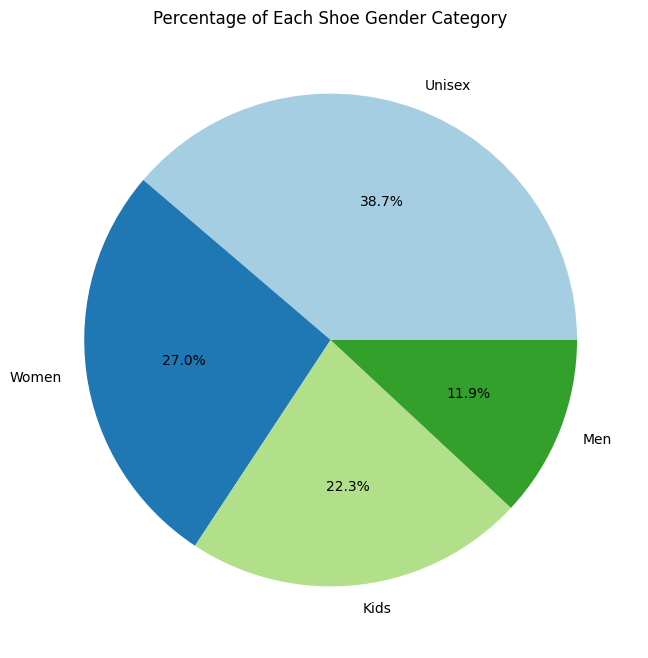

In [216]:
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired(range(len(gender_counts)))
)

plt.title("Percentage of Each Shoe Gender Category")
plt.show()

### **Gender-Based Shoe Inventory Analysis**

The Adidas webstore's shoe inventory distribution indicates that **Unisex shoes** make up the largest portion, with **758,211 entries (43.19%)**, suggesting that Adidas prioritizes versatile footwear that appeals to a broad audience.  

**Women's shoes** follow at **431,651 (24.59%)**, reflecting a significant focus on gender-specific designs for female consumers. Similarly, **Kids' shoes** account for **426,602 (24.30%)**, showing a strong market presence for children's footwear.  

**Men's shoes** represent the smallest share, with only **139,133 entries (7.93%)**, which is considerably lower than the other categories. This may indicate that Adidas places a stronger emphasis on unisex and women's footwear rather than exclusively male-oriented designs.  

Overall, the inventory distribution suggests that Adidas prioritizes **unisex and women's categories**, possibly due to broader market appeal, evolving consumer preferences, or strategic product positioning. However, further analysis, including sales data, would be necessary to determine if this distribution aligns with actual purchasing behavior.


### Bivariate EDA


In this section, the features or columns that may have a clear relationship with each other are investigated. Possible candidates that could have a pattern are identified as follows:

1. Price vs Gender
2. Dominant Color vs Gender

#### Price vs Gender

A fairly common term is pink tax (the tendency for products marketed specifically toward women to be more expensive than those marketed toward men). It will be interesting to know if certain genders/categories of shoes are more expensive. 

C:\Users\tamse\AppData\Local\Temp\ipykernel_6264\3974003706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="price", data=shoes_fact, palette="viridis")


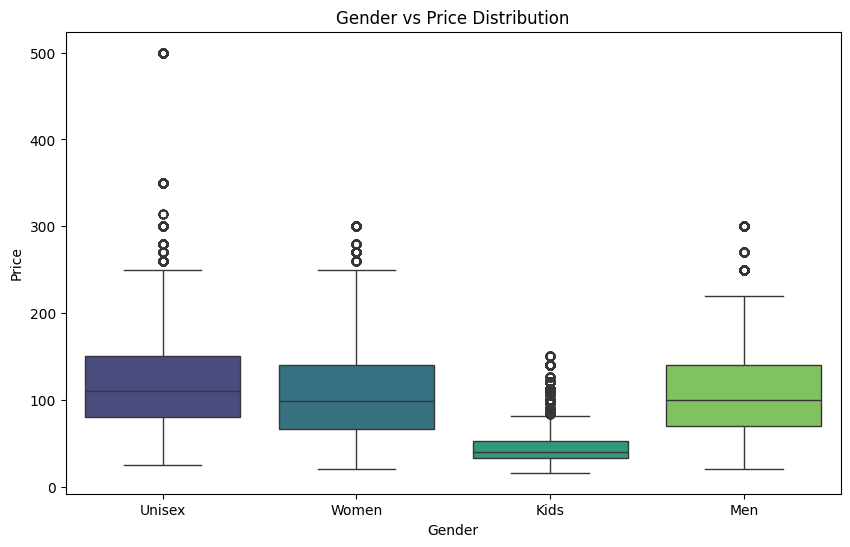

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="price", data=shoes_fact, palette="viridis")
plt.title("Gender vs Price Distribution")
plt.xlabel("Gender")
plt.ylabel("Price")
plt.show()


In [184]:
shoes_fact.groupby("gender")["price"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
gender,,,,
Kids,45.810432,40.0,16.0,150.0
Men,110.469714,100.0,20.0,300.0
Unisex,121.786368,110.0,25.0,500.0
Women,107.911476,99.0,20.0,300.0


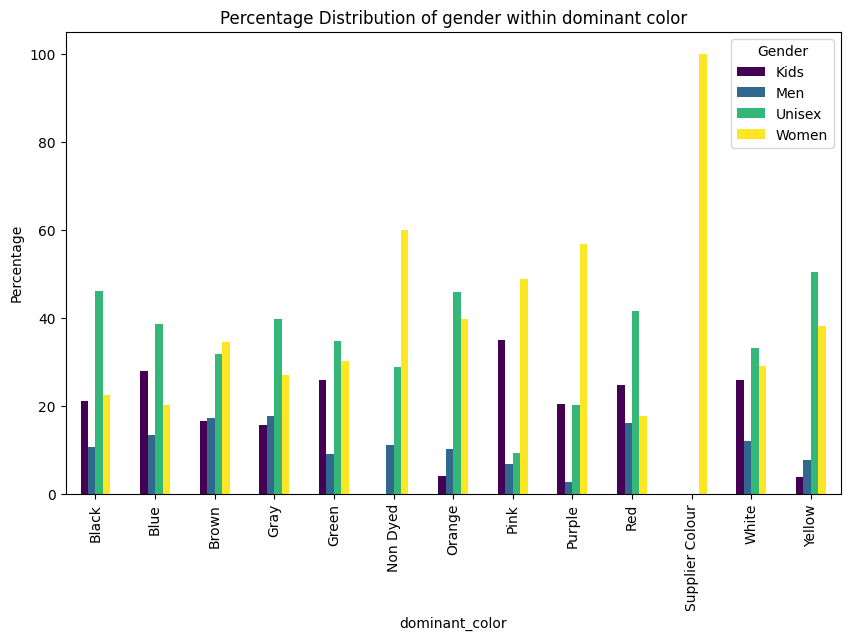

In [211]:
category_percentage = pd.crosstab(shoes_fact["dominant_color"], shoes_fact["gender"], normalize="index") * 100


category_percentage.plot(figsize=(10,6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of gender within dominant color")
plt.legend(title="Gender")
plt.show()

In [237]:
category_percentage

dominant_color,Black,Blue,Brown,Gray,Green,Non Dyed,Orange,Pink,Purple,Red,Supplier Colour,White,Yellow
gender,,,,,,,,,,,,,
Kids,35.496417,9.621685,2.833251,7.095095,5.687445,0.000000,0.203444,5.261111,1.238612,3.165343,0.000000,29.134318,0.263280
Men,33.454749,8.618661,5.578593,14.981788,3.706921,0.226954,0.952648,1.902494,0.308210,3.883441,0.000000,25.430092,0.955450
Unisex,44.870158,7.650764,3.142956,10.323527,4.395652,0.181175,1.323441,0.804072,0.712622,3.079113,0.000000,21.559831,1.956691
Women,31.312030,5.777690,4.897964,10.069759,5.501382,0.538987,1.647936,6.087452,2.859727,1.885834,0.064431,27.233078,2.123732


### Better Visualization

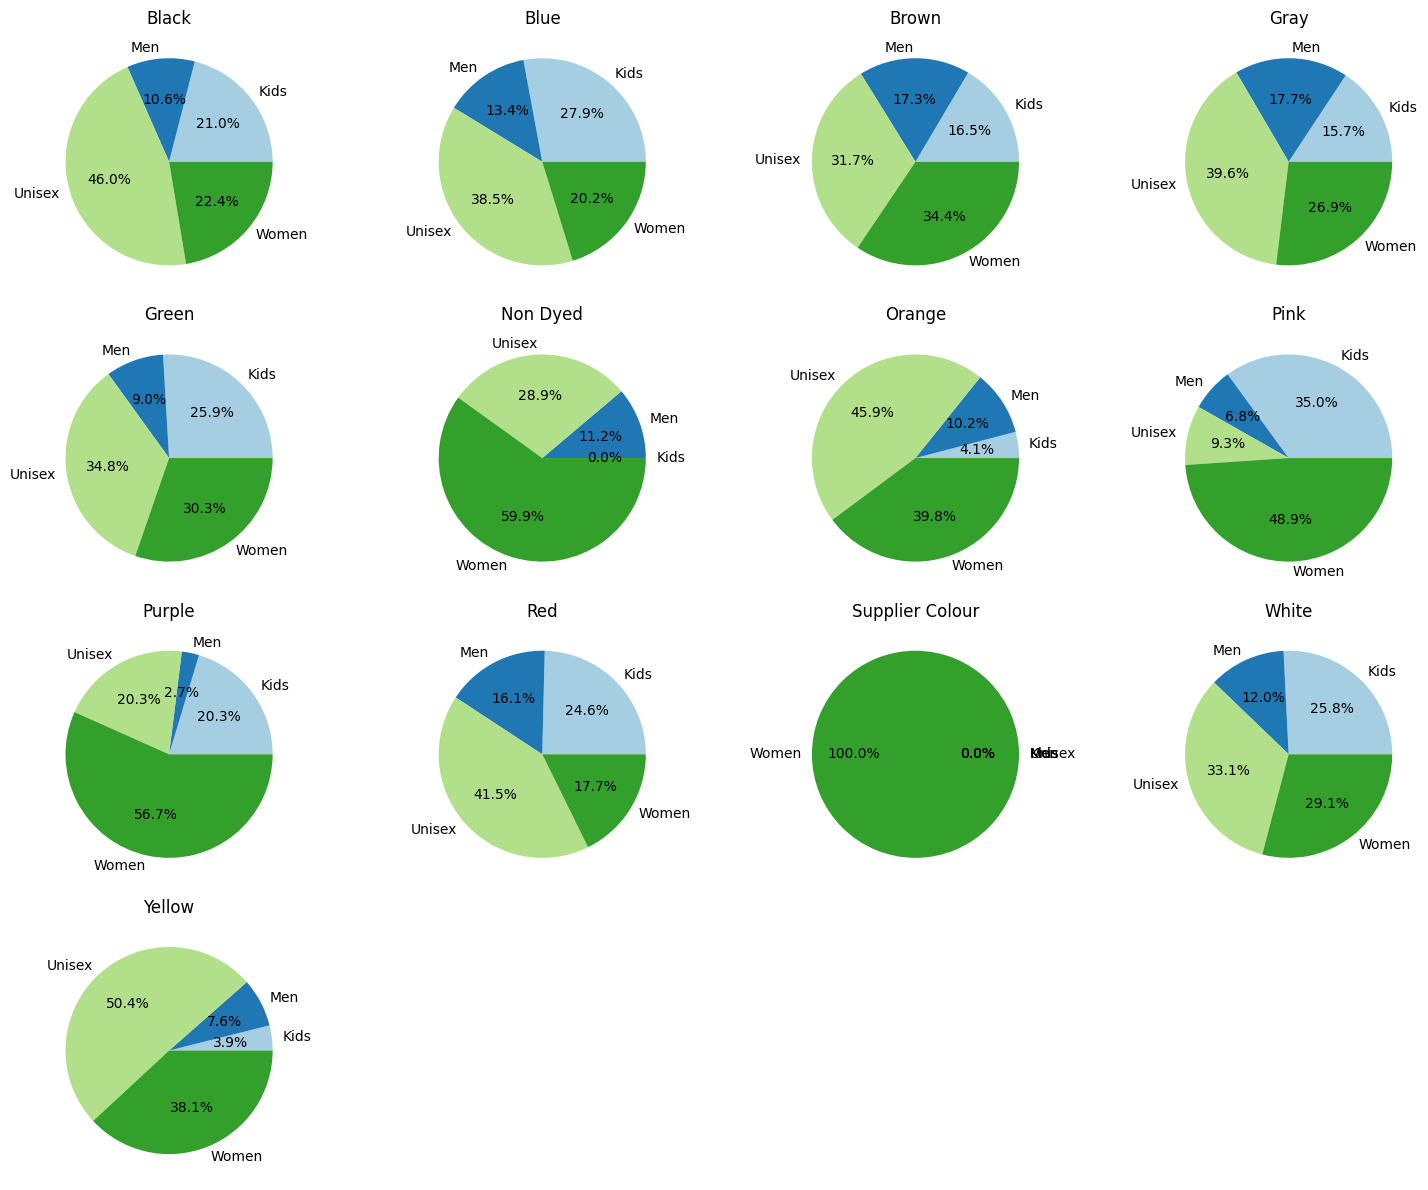

In [218]:
num_colors = len(category_percentage)
cols = 4  
rows = -(-num_colors // cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

axes = axes.flatten()

# Create a pie chart for each dominant color
for i, (color, row) in enumerate(category_percentage.iterrows()):
    axes[i].pie(row, labels=row.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)  # Use Paired for distinct colors
    axes[i].set_title(color)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The distribution of price and gender seem to have no strong relationship.

#### Dominant Color vs Gender

Some colors are often gendered. For example, pink is commonly thought of as a feminine color while blue is considered more of a masculine color. The dominant color may reveal a connection between color and gender.

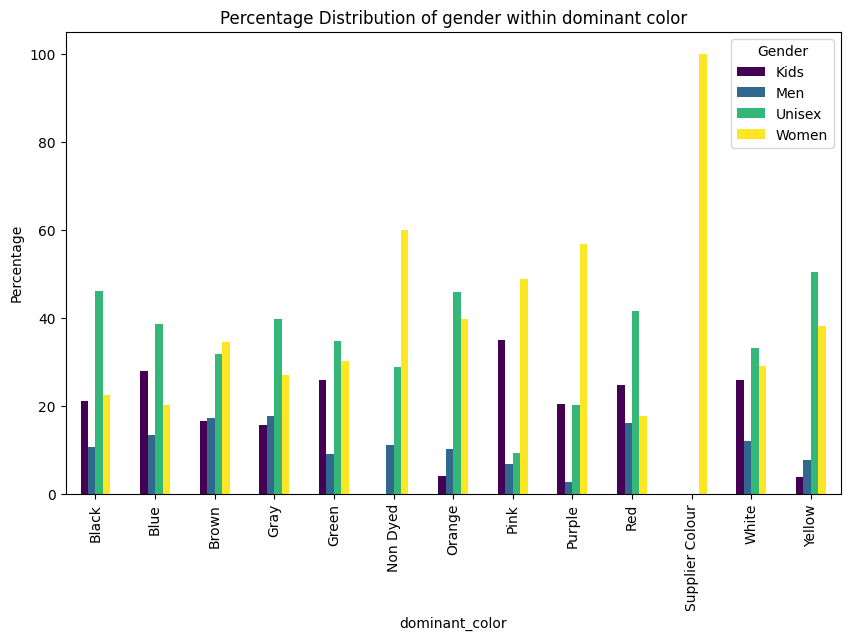

In [156]:
category_percentage = pd.crosstab(shoes_fact["dominant_color"], shoes_fact["gender"], normalize="index") * 100


category_percentage.plot(figsize=(10, 6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of gender within dominant color")
plt.legend(title="Gender")
plt.show()

In most of the categories, shoes labelled as unisex or women tend to occupy the largest percentage of shoes that consist of the color. Interestingly enough, pink and purple were dominated by women.  

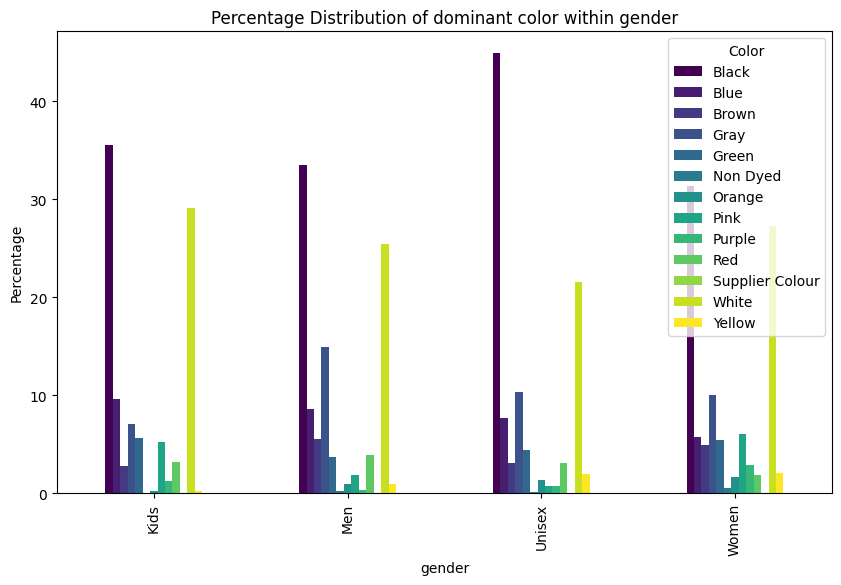

In [172]:
category_percentage = pd.crosstab(shoes_fact["gender"], shoes_fact["dominant_color"], normalize="index") * 100


category_percentage.plot(figsize=(10, 6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of dominant color within gender")
plt.legend(title="Color")
plt.show()

In [159]:
category_percentage

dominant_color,Black,Blue,Brown,Gray,Green,Non Dyed,Orange,Pink,Purple,Red,Supplier Colour,White,Yellow
gender,,,,,,,,,,,,,
Kids,35.496417,9.621685,2.833251,7.095095,5.687445,0.000000,0.203444,5.261111,1.238612,3.165343,0.000000,29.134318,0.263280
Men,33.454749,8.618661,5.578593,14.981788,3.706921,0.226954,0.952648,1.902494,0.308210,3.883441,0.000000,25.430092,0.955450
Unisex,44.870158,7.650764,3.142956,10.323527,4.395652,0.181175,1.323441,0.804072,0.712622,3.079113,0.000000,21.559831,1.956691
Women,31.312030,5.777690,4.897964,10.069759,5.501382,0.538987,1.647936,6.087452,2.859727,1.885834,0.064431,27.233078,2.123732


#### Better Visualization

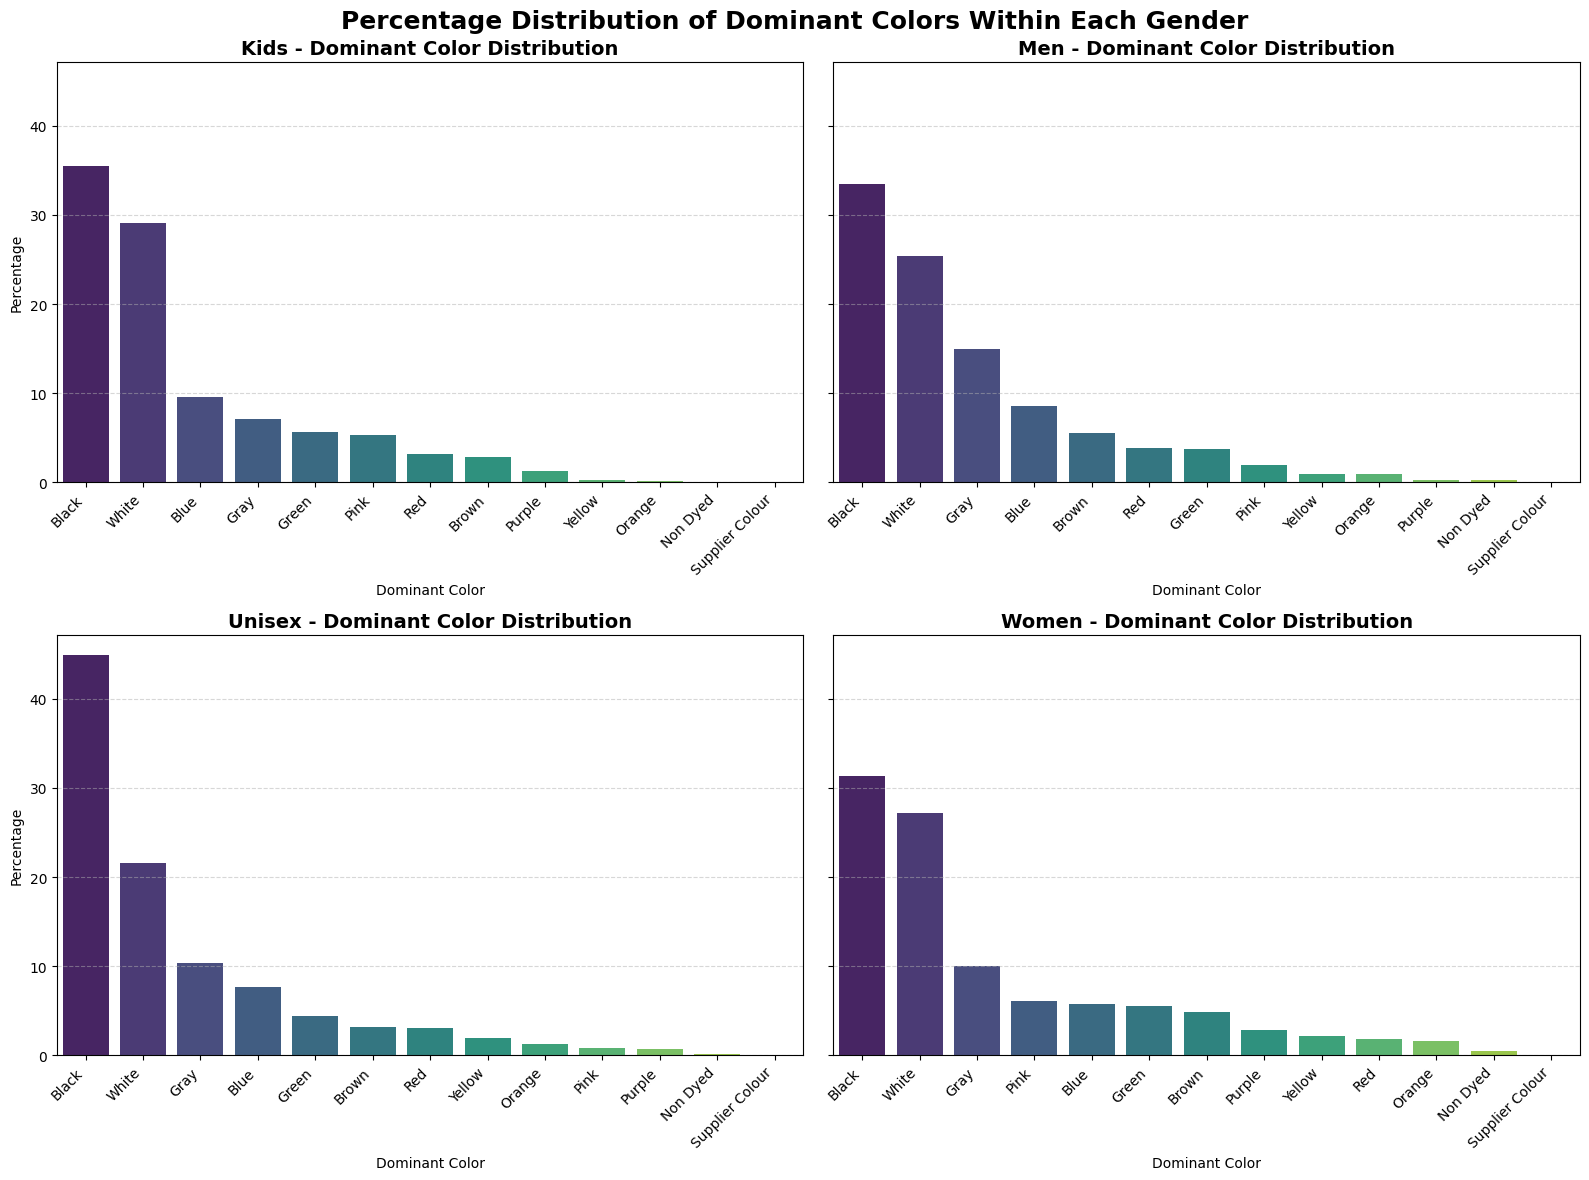

In [ ]:
category_percentage = pd.crosstab(shoes_fact["gender"], shoes_fact["dominant_color"], normalize="index") * 100
category_percentage = category_percentage.apply(lambda x: x.sort_values(ascending=False), axis=1)  # Sort within each gender

num_genders = len(category_percentage)

fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)  
axes = axes.flatten() 


for i, (gender, row) in enumerate(category_percentage.iterrows()):
    sorted_row = row.sort_values(ascending=False)  
    
    sns.barplot(
        x=sorted_row.index, 
        y=sorted_row.values, 
        ax=axes[i], 
        hue=sorted_row.index,  
        palette=sns.color_palette("viridis", len(sorted_row)),
        legend=False  
    )
    
    axes[i].set_title(f"{gender} - Dominant Color Distribution", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Percentage")
    axes[i].set_xlabel("Dominant Color")
    
    axes[i].set_xticks(range(len(sorted_row.index)))
    axes[i].set_xticklabels(sorted_row.index, rotation=45, ha="right")  
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Percentage Distribution of Dominant Colors Within Each Gender", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

All gender labels had a trend of black and white being most common. Gray is the next most common color for most of the labels except kids. Blue and brown are also relatively high up in frequency. 